## LAB  Recommended Song

In [1]:
!pip install yellowbrick
#Import the necesary libraries
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import dotenv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")


with open(r"C:\Users\laura\Desktop\ironhack\Web-Scrapping\Song-recomended\spotify-2023.csv", 'r', encoding='latin1') as file:
    data = pd.read_csv(file)

In [2]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="a63fafaf63a24d629339bdb79d1594ab",
                                                           client_secret="ed600c37d96a48a9a0b126e1f2c5e4c8"))

data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
display(data.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [4]:
#Creating a function to get the song features, year, duration, explicit, and time signature
def get_song_features(track_id):
    track = sp.track(track_id)
    features = sp.audio_features(track_id)
    song = {
        'explicit': track['explicit'],
        'danceability_%': features[0]['danceability'],
        'energy_%': features[0]['energy'],
        'key': features[0]['key'],
        'mode': features[0]['mode'],
        'speechiness_%': features[0]['speechiness'],
        'acousticness_%': features[0]['acousticness'],
        'instrumentalness_%': features[0]['instrumentalness'],
        'liveness_%': features[0]['liveness'],
        'valence_%': features[0]['valence'],
        'tempo': features[0]['tempo'],
        'duration_ms': features[0]['duration_ms'],
        'time_signature': features[0]['time_signature'],
        'released_year': track['album']['release_date'][:4],
        'track_id': track_id,
        'track_name': track['name'],
        'artist(s)_name': track['artists'][0]['name'],
    }
    return [song]

In [5]:
def get_popular_song(artist):
    results = sp.search(q=artist, limit=1)
    artist_id = results['tracks']['items'][0]['artists'][0]['id']
    top_tracks = sp.artist_top_tracks(artist_id)
    
    popular_song = {
        'track_name': top_tracks['tracks'][0]['name'],
        'artist(s)_name': artist,
        'artist_count': 1,  # Si es el artista principal, poner 1
        'released_year': int(top_tracks['tracks'][0]['album']['release_date'][:4]),
        'released_month': int(top_tracks['tracks'][0]['album']['release_date'][5:7]),
        'released_day': int(top_tracks['tracks'][0]['album']['release_date'][8:10]),
        'in_spotify_playlists': 0,
        'in_spotify_charts': 0,
        'streams': top_tracks['tracks'][0]['popularity'],  # Otra forma de medir popularidad
        'in_apple_playlists': 0,
        'in_apple_charts': 0,
        'in_deezer_playlists': 0,
        'in_deezer_charts': 0,
        'in_shazam_charts': 0,
        'bpm': 0,
        'key': 'Unknown',
        'mode': 'Unknown',
        'danceability%': 0,
        'valence_%': 0,
        'energy_%': 0,
        'acousticness_%': 0,
        'instrumentalness_%': 0,
        'liveness_%': 0,
        'speechiness_%': 0,
        'cluster': 0,
        'cluster_dbscan': 0,
        'cluster_gmm': 0
    }
    
    return popular_song

In [6]:
#Test the function of Song features
print(get_song_features('6f3Slt0GbA2bPZlz0aIFXN'))

#Test the function of the popular song
print(get_popular_song('My Mind & Me'))

[{'explicit': False, 'danceability_%': 0.798, 'energy_%': 0.62, 'key': 8, 'mode': 0, 'speechiness_%': 0.232, 'acousticness_%': 0.414, 'instrumentalness_%': 0.0192, 'liveness_%': 0.112, 'valence_%': 0.235, 'tempo': 120.031, 'duration_ms': 164000, 'time_signature': 4, 'released_year': '2020', 'track_id': '6f3Slt0GbA2bPZlz0aIFXN', 'track_name': 'The Business', 'artist(s)_name': 'Tiësto'}]
{'track_name': 'Calm Down (with Selena Gomez)', 'artist(s)_name': 'My Mind & Me', 'artist_count': 1, 'released_year': 2023, 'released_month': 4, 'released_day': 27, 'in_spotify_playlists': 0, 'in_spotify_charts': 0, 'streams': 78, 'in_apple_playlists': 0, 'in_apple_charts': 0, 'in_deezer_playlists': 0, 'in_deezer_charts': 0, 'in_shazam_charts': 0, 'bpm': 0, 'key': 'Unknown', 'mode': 'Unknown', 'danceability%': 0, 'valence_%': 0, 'energy_%': 0, 'acousticness_%': 0, 'instrumentalness_%': 0, 'liveness_%': 0, 'speechiness_%': 0, 'cluster': 0, 'cluster_dbscan': 0, 'cluster_gmm': 0}


In [7]:
print(data.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [8]:
selected_data = data[['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [9]:
selected_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [10]:
# Selecciona solo las columnas numéricas para escalar
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

# Escala los datos
scaler = StandardScaler()
X_prep = scaler.fit_transform(data[numeric_columns])


In [11]:
# Crea una instancia de KMeans
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajusta el modelo KMeans a los datos escalados
kmeans.fit(X_prep)

KMeans(n_clusters=4, random_state=42)

In [12]:
# predecir |  asignar clusters:
clusters = kmeans.predict(X_prep)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 3,
       2, 0, 1, 2, 1, 0, 2, 0, 0, 3, 2, 0, 0, 1, 3, 2, 2, 2, 0, 0, 3, 0,
       0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 3, 0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       3, 2, 1, 1, 3, 3, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1,
       0, 0, 3, 2, 1, 1, 2, 2, 0, 1, 1, 3, 1, 2, 0, 3, 2, 1, 1, 1, 3, 1,
       1, 1, 1, 3, 1, 0, 0, 1, 3, 2, 1, 0, 3, 2, 3, 2, 2, 2, 3, 3, 1, 1,
       3, 3, 0, 3, 2, 1, 3, 2, 2, 1, 3, 3, 3, 3, 0, 1, 0, 1, 2, 3, 1, 1,
       1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 1, 0, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 3, 1, 1, 1, 1,

In [13]:
# ver el tamaño de los clusters
pd.Series(clusters).value_counts().sort_index()

0    122
1    509
2    219
3    103
dtype: int64

In [14]:
# Explore the cluster assignment in the original dataset
X_df = data
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,1
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,1
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,0


In [15]:
# "performance metric"
kmeans.inertia_

12491.881728116636

In [16]:
import numpy as np

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

[14522.973553838272,
 13342.5113323712,
 12492.004993126215,
 11809.650705296868,
 11187.124191898412,
 10631.473560062075,
 10155.207924222597,
 9779.079220998108,
 9482.081338771386,
 9215.051289338406,
 9004.909850213602,
 8807.804587129434,
 8611.33998206548,
 8503.10909347966,
 8340.67785522256,
 8249.798437671827,
 8132.8514538259205,
 8040.913091372395]

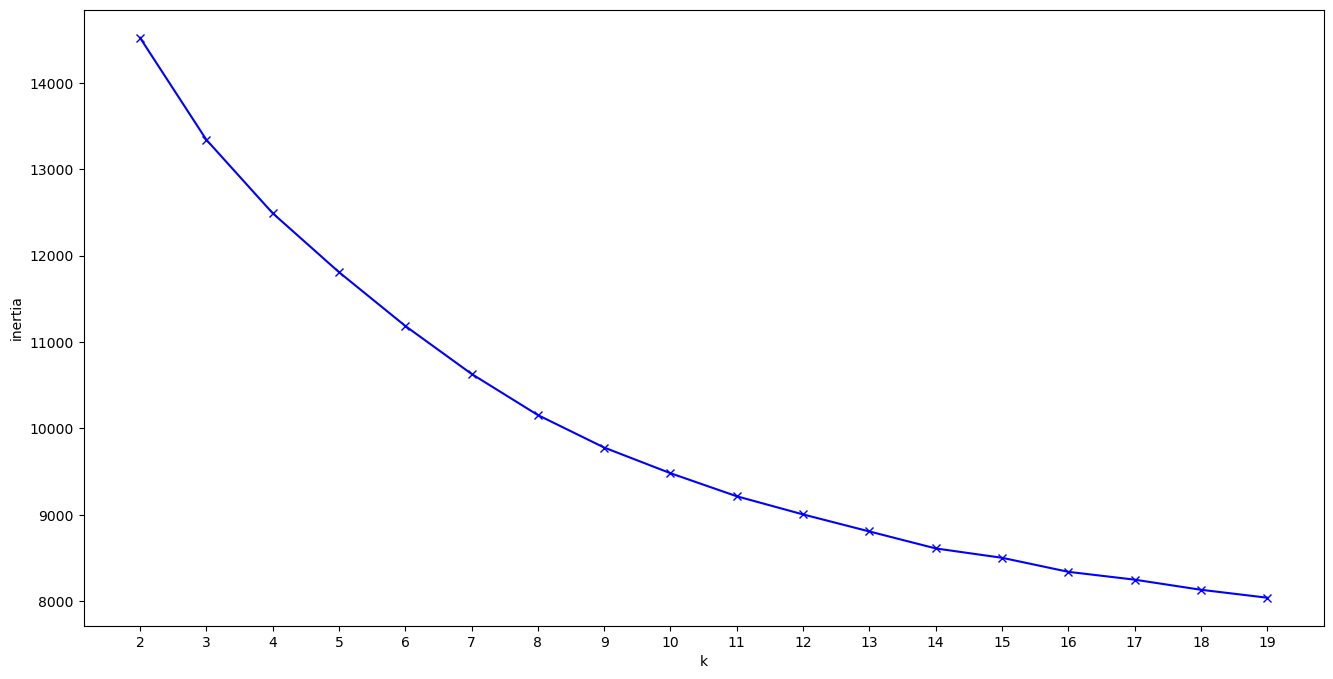

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [18]:
#Checking the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_prep)
    wcss.append(kmeans.inertia_)

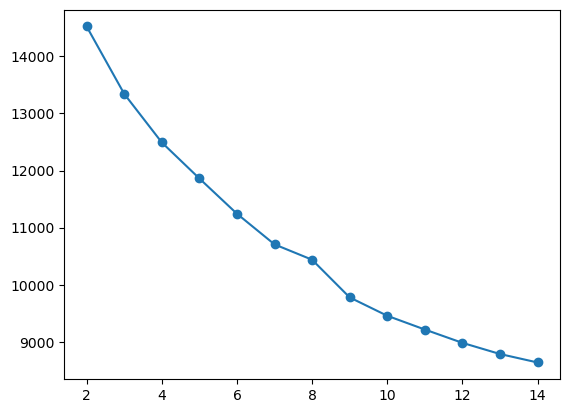

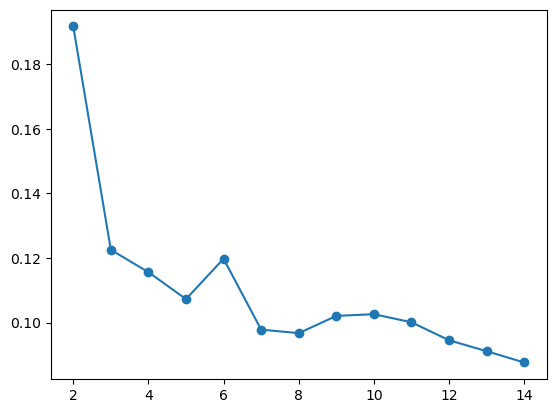

In [19]:
inertia = []
silhouette_scores = []
ranges = range(2,15)

for k in ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_prep)
    inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_prep, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(ranges,inertia, marker = "o")
plt.show()

plt.plot(ranges, silhouette_scores, marker="o") 

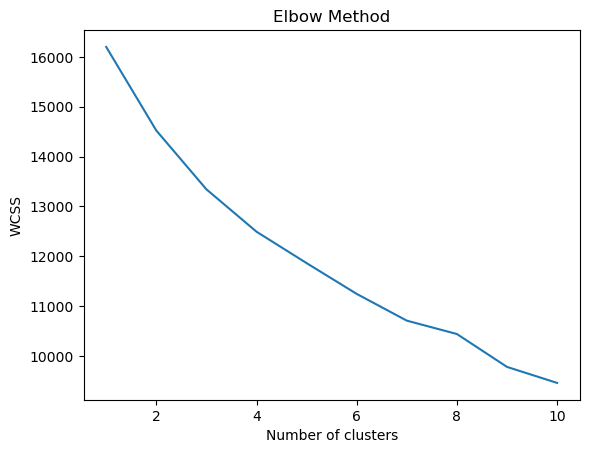

In [20]:
#Plotting the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

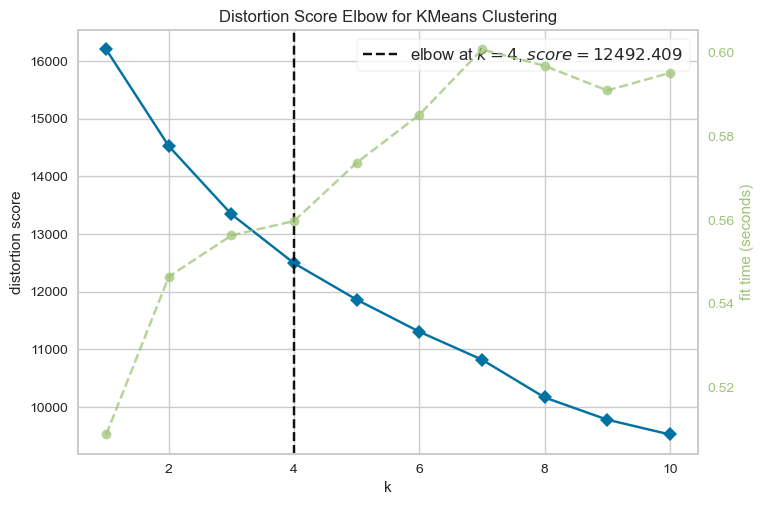

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#Plotting using Yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X_prep)
visualizer.show()

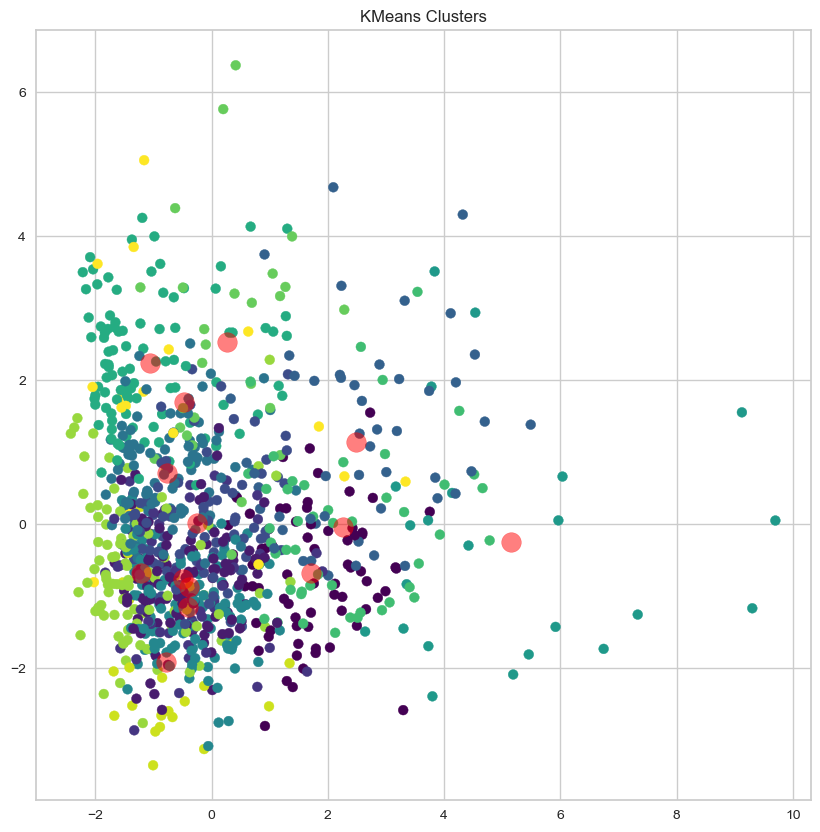

In [22]:
#Plotting the clusters and its centroids
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_prep)
pca_centers = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans Clusters')
plt.show()

In [23]:
#Trying to cluster the data using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X_prep)
data['cluster_dbscan'] = dbscan.labels_

data['cluster_dbscan'].value_counts()

-1    953
Name: cluster_dbscan, dtype: int64

In [24]:
#Trying to cluster the data using Gaussian Mixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X_prep)
data['cluster_gmm'] = gmm.predict(X_prep)

data['cluster_gmm'].value_counts()

0    599
2    237
1    117
Name: cluster_gmm, dtype: int64

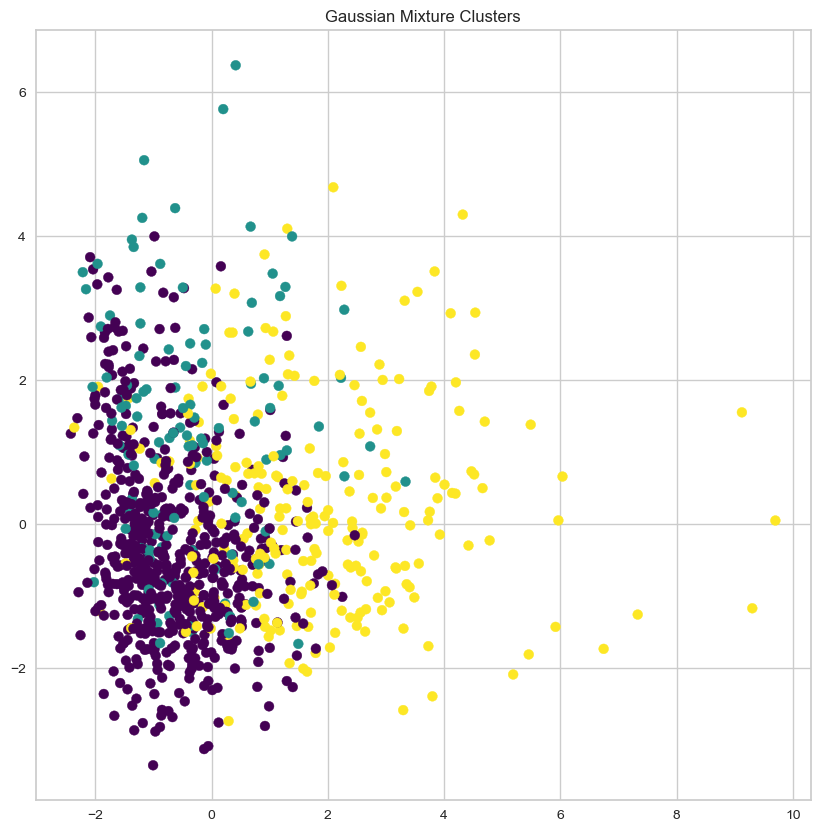

In [25]:

#Plotting the clusters and its centroids
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm.predict(X_prep), s=50, cmap='viridis')
plt.title('Gaussian Mixture Clusters')
plt.show()

### Viendo los resultados de las dos graficas usando Kmeans y Gaussian, creo que es mejor y mas preciso usando los Kmeans.

In [26]:
#Creating a function to search for a song in the dataframe and return the cluster
def get_cluster(song):
    try:
        return data[data['track_name'] == song]['cluster'].values[0]
    except:
        return None

In [27]:
#Finally we can test the function
get_cluster('Bigger Than The Whole Sky')

1

In [28]:
print(data.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cluster', 'cluster_dbscan', 'cluster_gmm'],
      dtype='object')


In [29]:
# Crear un diccionario con los nombres actuales y los nuevos nombres
columns_df = {
    'artist(s)_name': 'artist',
    'danceability%': 'danceability_percent',
    'valence_%': 'valence_percent',
    'track_name' : 'song',
    'energy_%' : 'energy',
    'acousticness_%' : 'acousticness',
    'instrumentalness_%' : 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%' :'speechiness'
}

# Utilizar el método rename para renombrar las columnas
data.rename(columns=columns_df, inplace=True)

In [30]:
data

,song,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_percent,energy,acousticness,instrumentalness,liveness,speechiness,cluster,cluster_dbscan,cluster_gmm
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,80,89,83,31,0,8,4,2,-1,2
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,71,61,74,7,0,10,4,2,-1,2
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,51,32,53,17,0,31,6,2,-1,2
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,55,58,72,11,0,11,15,2,-1,2
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,65,23,80,14,63,11,6,2,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,60,24,39,57,0,8,3,1,-1,0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,42,7,24,83,1,12,6,1,-1,1
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,80,81,67,4,0,8,6,0,-1,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,82,67,77,8,0,12,5,0,-1,0


In [31]:
## Create the app recomendation

In [32]:
# Calcular similitud entre clusters
clusters = data['cluster'].unique()
cluster_features_matrix = pd.get_dummies(data['cluster']).values

In [33]:
# Calcular similitud entre los clusters
cosine_sim = cosine_similarity(cluster_features_matrix)

In [34]:
data['song_artist'] = data['song'] + ' - ' + data['artist']

In [35]:
# Función para obtener recomendaciones basadas en clusters y filtrar por una palabra específica

def get_cluster_recommendations(song, cosine_sim=cosine_sim):
    data['song'] = data['song'].str.lower()  # Convertir nombres de canciones a minúsculas
    data['song'] = data['song'].str.replace('&', 'and')  # Reemplazar '&' por 'y'

    input_song = song.lower()  # Convertir nombre de la canción ingresada a minúsculas
    input_song = input_song.replace('&', 'and')  # Reemplazar '&' por 'y' en la canción ingresada

    song_cluster = data[data['song'] == input_song]['cluster'].values[0]
    sim_scores = list(cosine_sim[song_cluster])
    sim_scores = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Excluir la canción de entrada
    song_indices = [i[0] for i in sim_scores]

    return data['song_artist'].iloc[song_indices]

In [36]:
# Función para manejar la solicitud del usuario
def recommend_song():
    input_song = entry_song.get()
    if input_song:
        try:
            recommendations = get_cluster_recommendations(input_song)
            messagebox.showinfo("Recomendaciones", "\n".join(recommendations))
        except IndexError:
            messagebox.showerror("Error", "¡La canción no se encuentra en la base de datos!")
    else:
        messagebox.showerror("Error", "¡Por favor, ingrese el título de una canción!")

In [ ]:
# Configuración de la interfaz
root = tk.Tk()
root.title("Song Recommender")

label_instructions = tk.Label(root, text="Ingrese el título de una canción:")
label_instructions.pack()

entry_song = tk.Entry(root, width=50)
entry_song.pack()

button_recommend = tk.Button(root, text="Obtener recomendaciones", command=recommend_song)
button_recommend.pack()

root.mainloop()